# Proyecto IA 2019-2
<img src="https://raw.githubusercontent.com/ivanrcas/ACV_ai_project/master/proyecto/banner.png" border="3" width="700px">

**<h1>Análisis de calidad de vida en Colombia</h1>**<br>
INTEGRANTES
* Ivan Castillo
* Juan Castellanos
* Gabriela Vega

**<h2>Encuesta Nacional de Calidad de Vida</h2>** 

Estas investigaciones cuantifican y caracterizan las condiciones de vida de los colombianos. Se utiliza un dateset realizado en el año 2018 (Censo nacional) por el DANE.


**<h2>Descripción del problema</h2>**

Clasificar por vivienda y servicios básicos las características que influyen en la calidad de vida de los hogares colombianos.
*   Servicio de luz electrica
*   Servicio de alcantarillado
*   Servicio de agua
*   Recolección de basuras

Por otro lado, se analiza el tipo de vivienda en el cual habitan los diferentes hogares y factores externos que influyen en la calidad de vidad como:

*   Avalanchas, derrumbes o deslizamientos.
*   Hundimientos de terrenos.
*   Ruidos provenientes del exterior.
*   Malos olores.
*   Presencia de basuras en las calles.
*   Contaminación por polución.
*   Contaminación en las fuentes hidrícas.
*   invación del espacio pubiblico.
*   Presencia de roedores.
*   Presencia de insectos.



<hr>

In [0]:
#Drive Mount - Juan
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/ai-uis-student/Proyecto_inteligencia_artificial
!pwd

In [0]:
# Drive Mount - Para Ivan y Gabriela
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/Proyecto_inteligencia_artificial
!pwd

# **1. IMPORTAR LIBRERÍAS**


In [0]:
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score,  train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#Función que retorna el tiempo de ejecución. Se utilizará para observaciones y analisis más adelante.
import time

#**2. TRATAMIENTO DE DATOS**





Fuentes de datasets: 
*   [Ingresar a descripción de variables (Nombres de columnas)](http://microdatos.dane.gov.co/index.php/catalog/607/data_dictionary#page=F130&tab=data-dictionary)
*   [Fuente del Dataset DANE - Datos de la vivienda](http://microdatos.dane.gov.co/index.php/catalog/607/get_microdata)

Se carga el dataset y se realizará un tratamiento a las filas que contengan datos nulos con cadenas vacióas o NaN para evitar el sesgo en el analísis.

In [3]:
#Lectura de datos
d = pd.read_csv("../Proyecto_inteligencia_artificial/data/dataProyecto.csv", sep=";")
d.replace(' ',np.nan, inplace=True)
print(d.shape)
d.head(10)
#1-Lo primero que vamos hacer es cargar todo el data ser para poder trabajar con el teniendo en cuenta que el sep que le indica a pandas como se parte el dataset.
#2-Lo segundo es que vamos a rellenar datos que se encuentren vacios con NaN para poder identificarlos.


(88713, 35)


,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,REGION,DPTO,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,P8520,P8520S1,P8520S1A1,P8520S5,P8520S3,P8520S4,P8520S4A1,P4065,P4065S1,P4065S2,P4065S3,P4065S4,P5661,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7
0,7000000,1,1,1,1,8,"384,328169349074",1,1,1,1,1,6,3,NaN,1,2,1,1,1,6,NaN,2,2,2,2,NaN,3,3,3,2,1,2,4,3
1,7000001,1,1,1,1,8,"297,172456158384",1,1,1,2,1,4,1,NaN,1,2,1,1,1,6,NaN,2,2,2,2,NaN,2,2,1,2,1,2,2,2
2,7000002,1,1,1,1,8,"274,640130499086",1,1,1,2,1,4,1,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,3,1,1,1,1,1,2,3
3,7000003,1,1,1,2,15,"125,253015015194",1,1,1,1,1,4,1,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,3,1,4,2,1,4,1,2
4,7000004,1,1,1,2,15,"195,420015121655",1,1,1,2,1,4,3,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,1,4,3,1,1,1,3,2
5,7000005,1,1,1,2,68,"257,551129890048",1,1,1,2,1,6,4,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,3,1,1,1,2,1,2
6,7000006,1,1,1,2,68,"259,426814015839",1,1,1,2,1,4,4,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,2,1,2,1,1,1,1
7,7000007,1,1,1,2,68,"340,968614879713",1,1,1,1,1,4,3,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,2,2,1,2,1,2,1,2
8,7000008,1,1,1,2,68,"335,225041053736",1,1,1,2,1,4,1,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,2,1,2,1,1,1,1
9,7000010,1,1,1,9,81,"20,5826086956517",1,1,1,1,1,4,4,NaN,1,1,1,1,1,2,NaN,2,2,2,2,NaN,1,1,1,1,1,1,1,1


In [0]:
d.shape

(88713, 35)

In [0]:
#se filtran el total de campos vacios por cada columna del dataset
d.isnull().sum(axis = 0)

DIRECTORIO                      0
SECUENCIA_ENCUESTA              0
SECUENCIA_P                     0
ORDEN                           0
REGION                          0
DPTO                            0
FEX_C                           0
CANT_HOG_COMPLETOS              0
CANT_HOGARES_VIVIENDA           0
CLASE                           0
Tipo_vivienda                   0
Material_paredes                0
Material_piso                   0
Material_techo                  0
P8520                       83028
Energía_eléctrica               0
Estrato                         0
Acueducto                       0
Alcantarillado                  0
Recoleccion_basuras             0
P8520S4A1                   26437
P4065                       83028
Inundaciones                    0
Avalanchas                      0
Hundimiento                     0
Ventarrones                     0
P5661                       83028
Ruidos                          0
Malos_olores                    0
Presencia_basu

Lo siguiente que vamos hacer es cambiar el nombre de las columnas al dataset para que se pueda identificar de mejor manera el significado de cada una de ellas.

In [0]:
d.rename(columns={'P1070': 'Tipo_vivienda', 'P4005': 'Material_paredes','P4015':'Material_piso','P4567':'Material_techo','P8520S1':'Energía_eléctrica','P8520S1A1':'Estrato','P8520S5':'Acueducto','P8520S3':'Alcantarillado','P8520S4':'Recoleccion_basuras','P4065S1':'Inundaciones','P4065S2':'Avalanchas','P4065S3':'Hundimiento','P4065S4':'Ventarrones','P5661S1':'Ruidos','P5661S2':'Malos_olores','P5661S3':'Presencia_basuras','P5661S4':'Contaminacion_aire','P5661S9':'Contaminacion_aguas','P5661S5':'Invasión_espacio_publico','P5661S6':'Presencia_animales','P5661S7':'Presencia_insectos'}, inplace=True)

In [0]:
d.head(10)

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,REGION,DPTO,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,Tipo_vivienda,Material_paredes,Material_piso,Material_techo,P8520,Energía_eléctrica,Estrato,Acueducto,Alcantarillado,Recoleccion_basuras,P8520S4A1,P4065,Inundaciones,Avalanchas,Hundimiento,Ventarrones,P5661,Ruidos,Malos_olores,Presencia_basuras,Contaminacion_aire,Contaminacion_aguas,Invasión_espacio_publico,Presencia_animales,Presencia_insectos
0,7000000,1,1,1,1,8,"384,328169349074",1,1,1,1,1,6,3,NaN,1,2,1,1,1,6,NaN,2,2,2,2,NaN,3,3,3,2,1,2,4,3
1,7000001,1,1,1,1,8,"297,172456158384",1,1,1,2,1,4,1,NaN,1,2,1,1,1,6,NaN,2,2,2,2,NaN,2,2,1,2,1,2,2,2
2,7000002,1,1,1,1,8,"274,640130499086",1,1,1,2,1,4,1,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,3,1,1,1,1,1,2,3
3,7000003,1,1,1,2,15,"125,253015015194",1,1,1,1,1,4,1,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,3,1,4,2,1,4,1,2
4,7000004,1,1,1,2,15,"195,420015121655",1,1,1,2,1,4,3,NaN,1,3,1,1,1,3,NaN,2,2,2,2,NaN,1,4,3,1,1,1,3,2
5,7000005,1,1,1,2,68,"257,551129890048",1,1,1,2,1,6,4,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,3,1,1,1,2,1,2
6,7000006,1,1,1,2,68,"259,426814015839",1,1,1,2,1,4,4,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,2,1,2,1,1,1,1
7,7000007,1,1,1,2,68,"340,968614879713",1,1,1,1,1,4,3,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,2,2,1,2,1,2,1,2
8,7000008,1,1,1,2,68,"335,225041053736",1,1,1,2,1,4,1,NaN,1,2,1,1,1,3,NaN,2,2,2,2,NaN,1,2,1,2,1,1,1,1
9,7000010,1,1,1,9,81,"20,5826086956517",1,1,1,1,1,4,4,NaN,1,1,1,1,1,2,NaN,2,2,2,2,NaN,1,1,1,1,1,1,1,1


Vamos a utilizar la matriz de correlación para identificar que columnas podemos utilizar para nuestro analisís


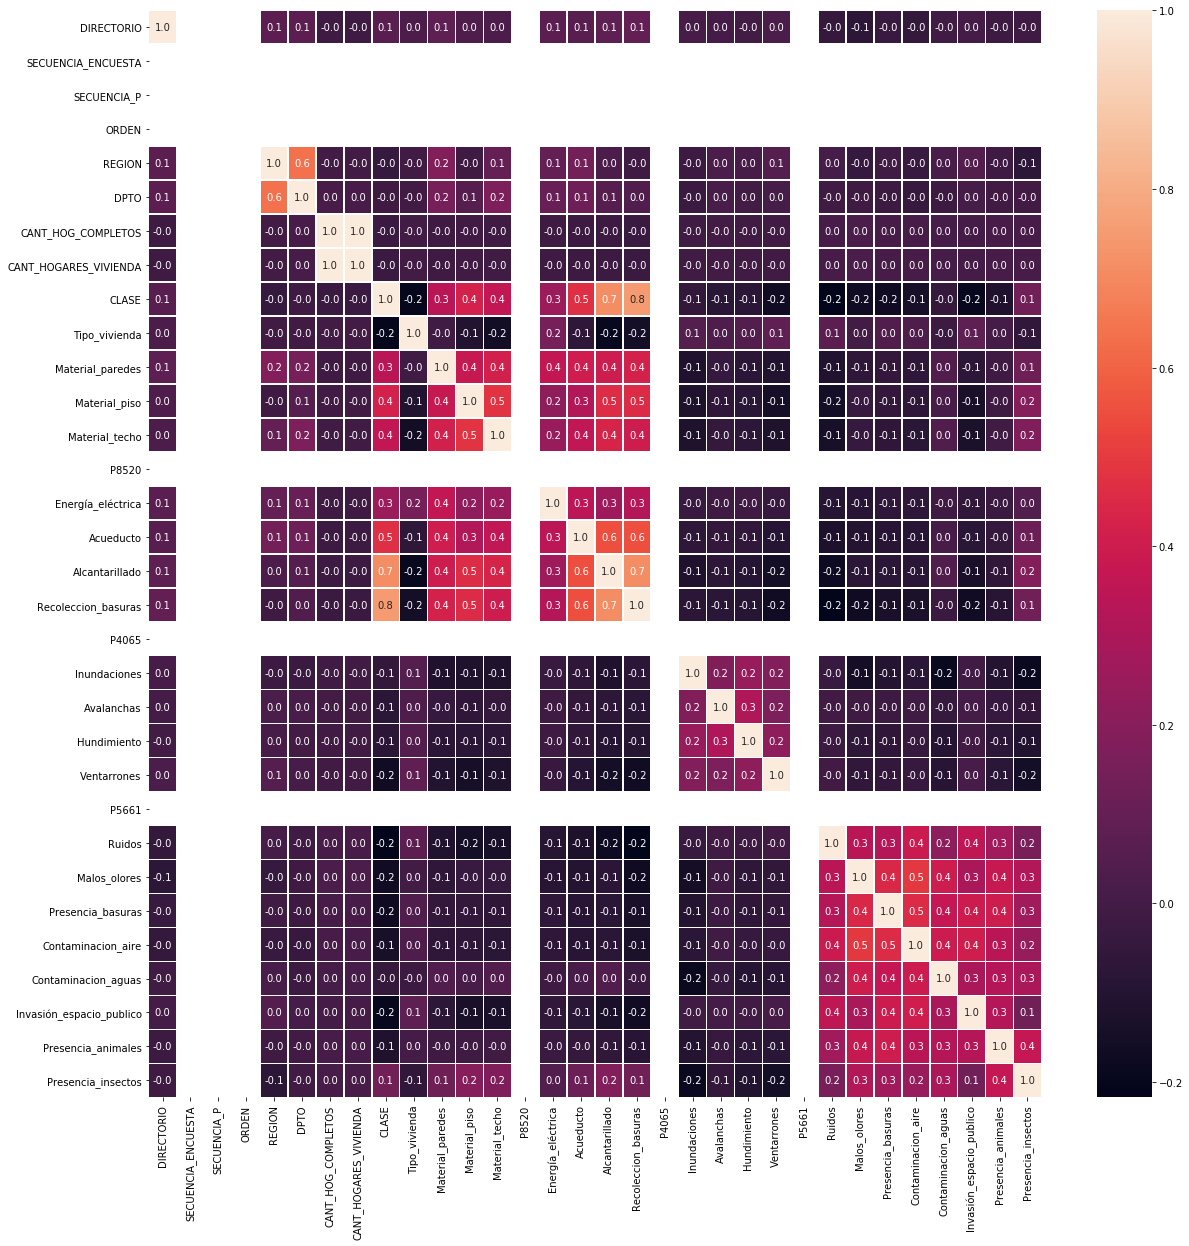

In [0]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(d.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Las características de las viviendas nos permite visualizar los registros del dataset. De esta forma, se pueden seleccionar los valores indicados para realizar el ajuste de estimadores posteriormente.

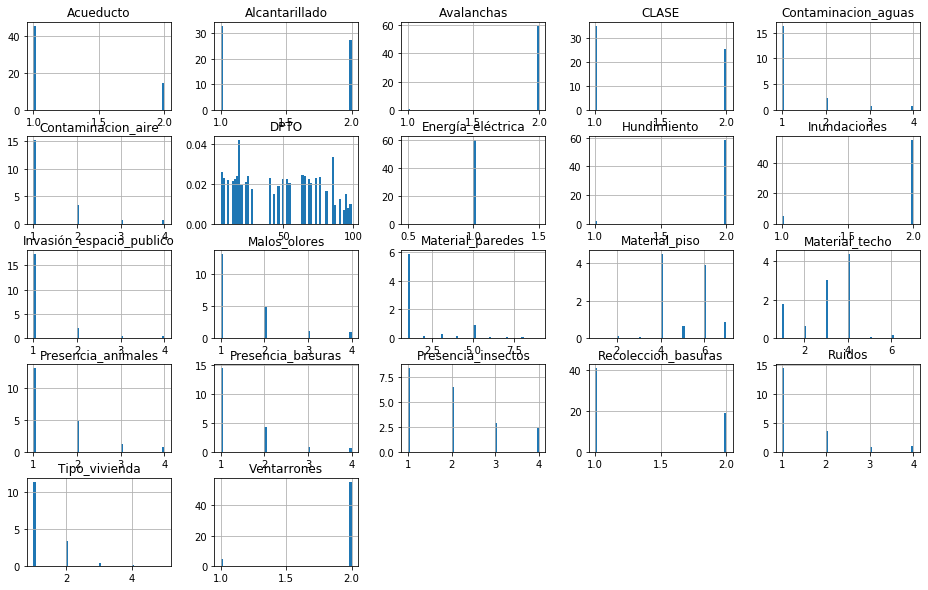

In [0]:
d.hist(bins=60, density=True, figsize=(16,10));

# **3. ANÁLISIS DE CARACTERÍSTICAS**

**TIPO DE VIVIENDA:** En las siguientes gráficas vamos a comprobar el tipo de viviendas que se tienen en cada uno de los departamentos.


In [0]:
#Conversión de valores int del Dpto a string Dpto
d_graficas = d
d_graficas['DPTO'].replace(
to_replace=[5,8,11,13,15,17,18,19,20,23,25,27,41,44,47,50,52,54,63,66,68,70,73,76,81,85,86,88,91,94,95,97,99],
value=['Antioquia','Atlántico','Bogotá D.C','Bolívar','Boyacá','Caldas','Caquetá','Cauca','Cesar','Cordoba','Cundinamarca','Choco','Huila','La Guajira','Magdalena','Meta','Nariño','Norte de Santander','Quindío','Risaralda','Santander','Sucre','Tolima','Valle del cauca','Arauca','Casanare','Putumayo','San Andrés','Amazonas','Guainía','Guaviare','Vaupés','Vichada'],
inplace=True
)

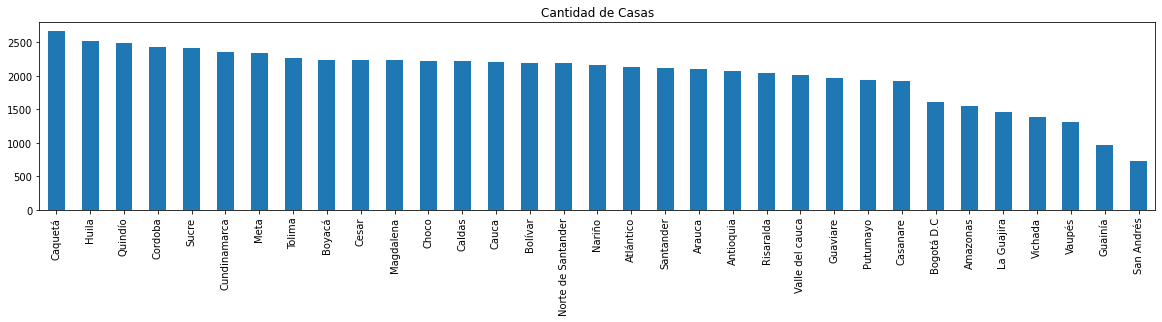

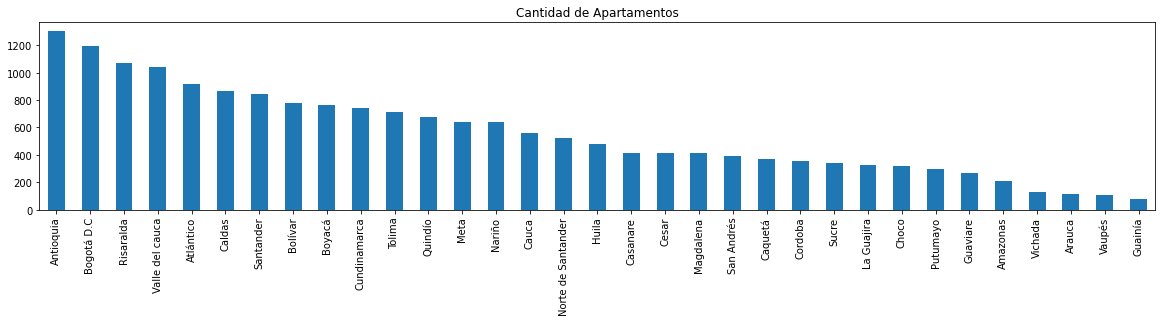

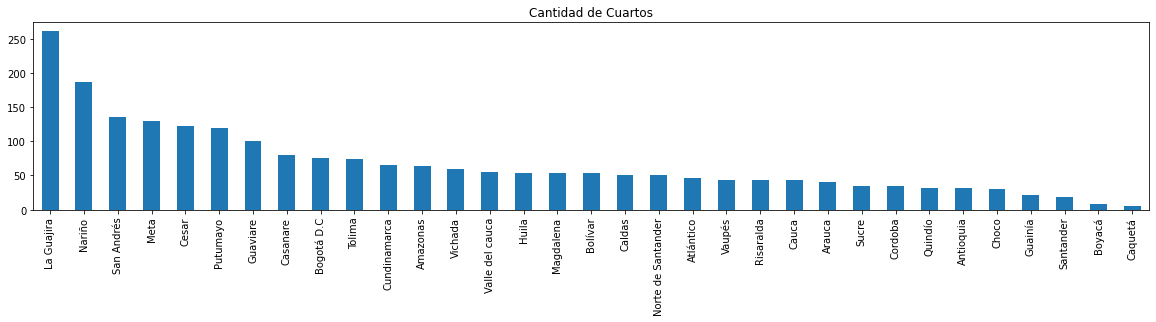

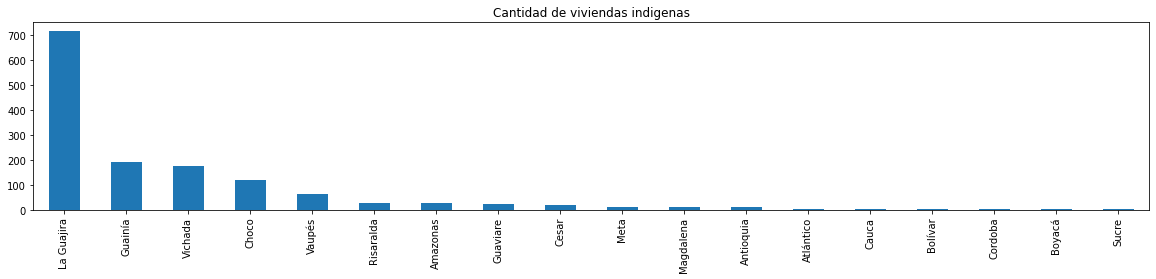

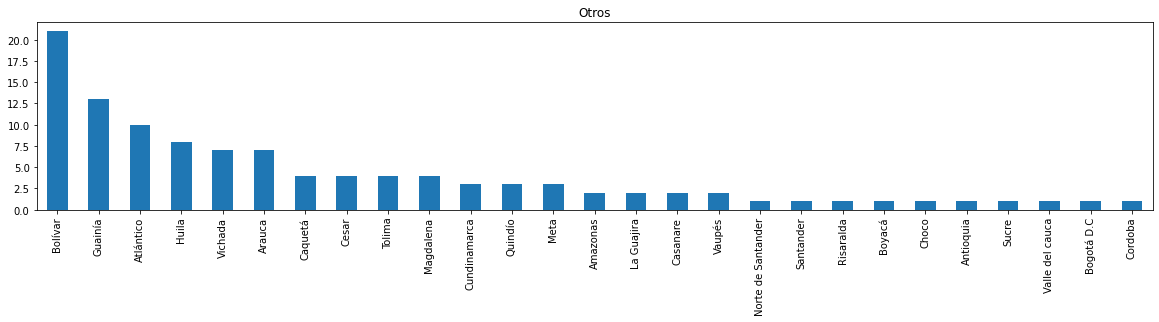

In [18]:
C=["Cantidad de Casas","Cantidad de Apartamentos","Cantidad de Cuartos","Cantidad de viviendas indigenas","Otros"]
n=1
nums = [0, 1, 2, 3, 4]
for i in nums:
    fig=plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1)
    plt.title(C[i])
    #P1070 = Tipo de Vivienda
    d_graficas.DPTO[d_graficas.P1070==n].value_counts().plot(kind='bar')
    n=n+1
    print("\n")
    plt.show()

**ESTRATO:** Las siguientes gráficas representa los estratos que presentan cada una de las diferentes viviendas que se tienen.

Además, cuando se dice "otros" según la encuesta ECV abarca lugares como carpas, contenedores, cueva, refugio natural, puente, etc.

In [0]:
#Conversión de valores int del Estrato a string Estrato.
d_graficas = d
#P8520S1A1: columna que corresponde a Estrato.
d_graficas['P8520S1A1'].replace(
to_replace=['1','2','3','4','5','6','8','9','0'],
value=['Bajo-Bajo', 'Bajo', 'Medio-Bajo', 'Medio', 'Medio-Alto', 'Alto', 'Planta eléctrica', 'No Saben', 'Servicio Pirata'],
inplace=True
)

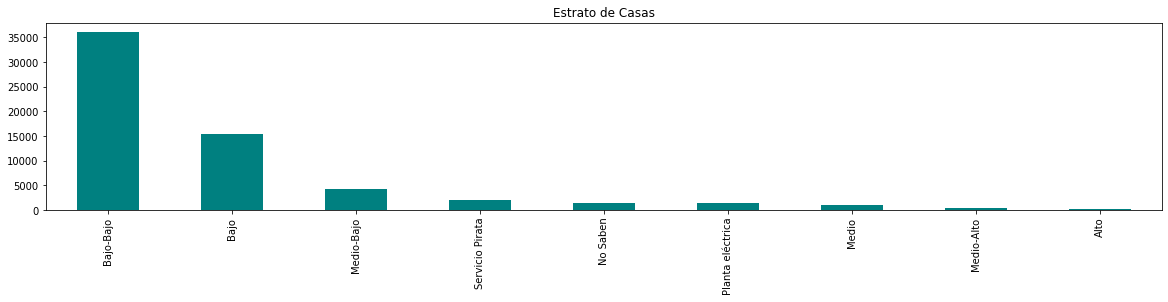

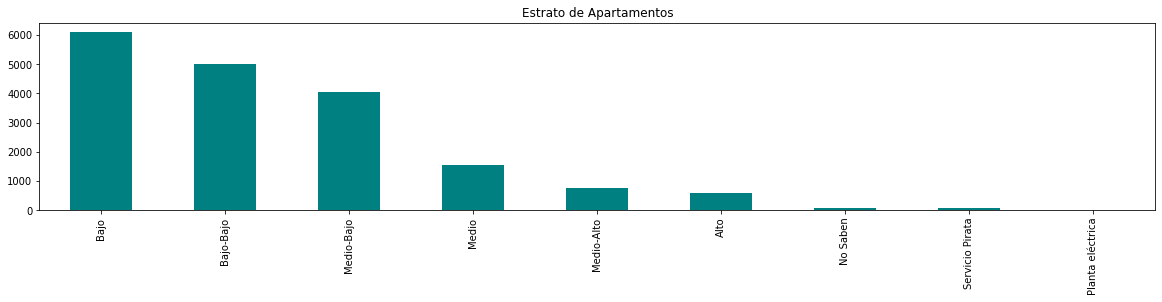

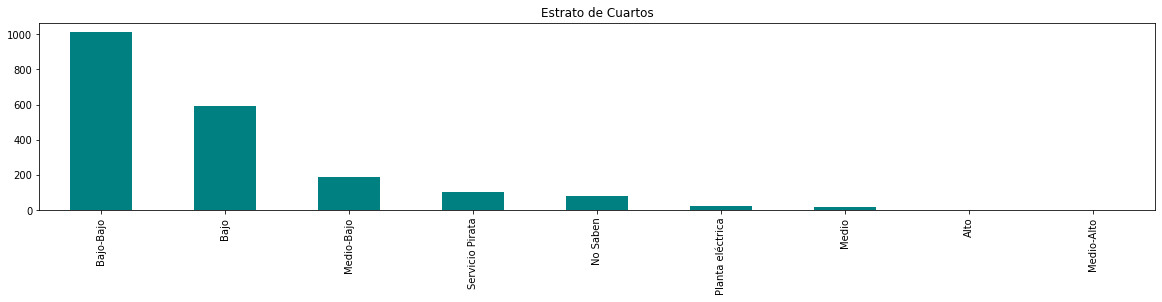

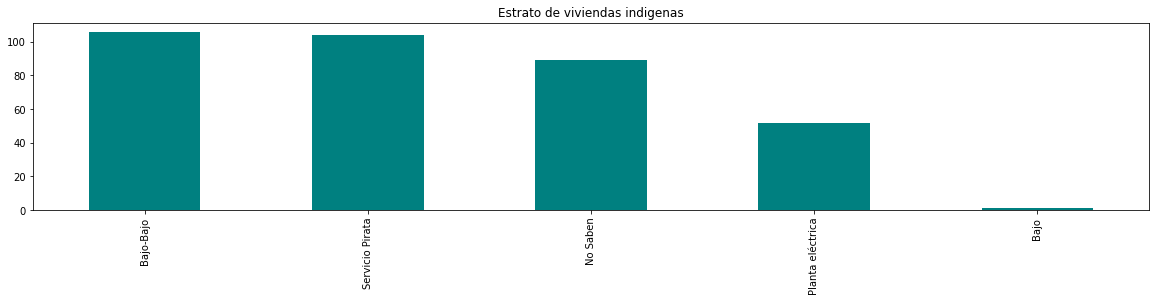

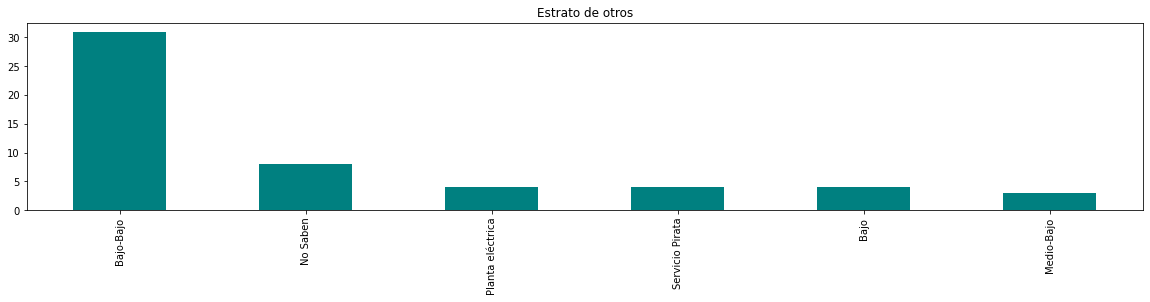

In [38]:
C=["Estrato de Casas","Estrato de Apartamentos","Estrato de Cuartos","Estrato de viviendas indigenas","Estrato de otros"]
n=1
nums = [0, 1, 2, 3, 4]
for i in nums:
    fig=plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1)
    plt.title(C[i])
    d_graficas.P8520S1A1[d_graficas.P1070==n].value_counts().plot(kind='bar',color='teal')
    n=n+1
    print("\n")
    plt.show()

**Análisis**

Como podemos ver en las graficas el tipo de vivienda que más se presenta en el país según la encuesta realizada por departamentos son las casas y que son muy pocos los casos registrados donde las personas se encuentren en viviendas como cambuches, carpas o puentes.

sin embargo, algo que sale a la vista con la segunda gráfica es que gran cantidad de las casas cuentan con un servicio de nivel bajo-bajo y otro de los análisis que podemos hacer y que resulta ser el más preocupante es que muchos de las viviendas indigenas cuentan con servicios de muy baja calidad o que han tenido que recurrir a opciones como piratear el servio, esto puede darse a muchos factores que sin duda muestran un abandono a este sector colombiano por parte de diferentes entidades o poco interes por parte de los entes reguladores.








<HR>

# **4. CLASIFICACIÓN**

Clasificamos los datos usando una lista de clases para identificar los servicios con los que cuenta cada estrato dependiendo de las viviendas donde se habita y las diferentes características en cuanto a calidad de vida que representan la población colombiana.


### **Procedimiento**


**1**. Usaremos dos muestras o subconjutos de datos con 20% de valores y 80% para train:

- Los subdatos A (con menos columnas eliminadas del dataset original)
- Los subdatos B (con más columnas eliminadas del dataset original).

Para eliminar las columnas con precisión significativa y menor incertidumbre, verificamos previamente en la Sección de Tratamiento de datos, las características que contienen muchos campos vacios y/o su aporte al contexto del problema no es relevante.

In [0]:
#d0 corresponde a Dataframe con subdatos o muestras A
#d corresponde a Dataframe con subdatos o muestras B
d0 = d
d0 = d0.drop(['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'REGION', 'FEX_C','P8520', 'P4065', 'P5661', 'P8520S4A1', 'CANT_HOG_COMPLETOS', 'CANT_HOGARES_VIVIENDA'], axis=1)

In [0]:
#se eliminan los datos de la columna Estrato donde el dato sea NaN.
d = d[d['Estrato'].notnull()]
d0 = d0[d0['Estrato'].notnull()]

**2**. Los tipos de clasificadores y los parámetros experimentados:

- RFC *(Random Forest Classifier)*
  - n_estimators=100
  - max_depth=50
- SVM *(Support Vector Machine)*
  - kernel='rbf'
- DTC *(Decision Tree Classifier)*
  - max_depth=10

**3**. Lista de clases (Ground truth). Se seleccionaron las siguientes:

  - Estrato
  - Tipo de vivienda
  - Material del techo


# **4.1. CLASIFICACIÓN POR ESTRATO**

Ya que el estrato de vivienda nos puede brindar un indicativo más claro de la calidad de vida que tienen los hogares colombianos,   teniendo en cuenta el significado de cada uno de los valores que presenta la columna:<br>
1 Bajo - Bajo <br>
2 Bajo <br>
3 Medio - Bajo <br>
4 Medio <br>
5 Medio - Alto <br>
6 Alto <br>
8 Planta eléctrica <br>
9 No conoce el estrato o no cuenta con recibo de pago. <br>
0 Recibos sin estrato o el servicio es pirata <br>

## Random Forest Classifier




### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Estrato', axis=1).columns
X = d0.drop('Estrato', axis=1).values
y = d0.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
RF = RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6080934601951102
- KFold Accuracy Test: 0.5829203630 (+/- 0.01459)
- RMAE =  0.8401364284179157
- Características más importantes: 
{'DPTO': 0.267265149418904, 'CLASE': 0.02293748790111204, 'Tipo_vivienda': 0.03323368311929628, 'Material_paredes': 0.03764541915808534, 'Material_piso': 0.09367940709047161, 'Material_techo': 0.06875162601544242, 'Energía_eléctrica': 0.0, 'Acueducto': 0.01809106333184563, 'Alcantarillado': 0.032417822254623314, 'Recoleccion_basuras': 0.019090408931213373, 'Inundaciones': 0.014142173930293229, 'Avalanchas': 0.00515806040510939, 'Hundimiento': 0.008203545406698346, 'Ventarrones': 0.01689530199161146, 'Ruidos': 0.05195460667545409, 'Malos_olores': 0.04823746681764504, 'Presencia_basuras': 0.04450618393211255, 'Contaminacion_aire': 0.04384072087208032, 'Contaminacion_aguas': 0.03532573817558231, 'Invasión_espacio_publico': 0.027359899748611666, 'Presencia_animales': 0.04955157992752149, 'Presen

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Estrato', axis=1).columns
X_rfc = d.drop(['Estrato', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_rfc = d.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2)

#Se prepara el estimador
RF=RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6640973142237745
- KFold Accuracy Test: 0.6168255442 (+/- 0.00727)
- RMAE =  0.781654643492485
- Características más importantes: 
{'DIRECTORIO': 0.31370210887362465, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.05986722447138136, 'DPTO': 0.10924659326982111, 'FEX_C': 0.0017105250676175288, 'CANT_HOG_COMPLETOS': 0.0017210046417322387, 'CANT_HOGARES_VIVIENDA': 0.016503866402876526, 'CLASE': 0.02420787820922588, 'Tipo_vivienda': 0.02706751358178979, 'Material_paredes': 0.07126598911195957, 'Material_piso': 0.05124939210857328, 'Material_techo': 0.0, 'P8520': 0.013656091757033674, 'Energía_eléctrica': 0.023882831272700036, 'Acueducto': 0.014841080039728347, 'Alcantarillado': 0.00971505203061249, 'Recoleccion_basuras': 0.0032528497149741605, 'P8520S4A1': 0.004891205239359716, 'P4065': 0.010766423681655153, 'Inundaciones': 0.03484459386832055, 'Avalanchas': 0.032247565445787454, 'Hundimiento': 0.02

## Support Vector Machine


### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
X = d0.drop('Estrato', axis=1).values
y = d0.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
SVM=SVC(kernel='rbf')

#Se estrena el estimador usando los datos destinados para el entrenamiento.
SVM.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred=SVM.predict(X_test)


print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.5720823798627003
- RMAE =  0.8824025320634995
- Tiempo de Ejecución: 310.1445710659027 segundos ---


### Subdatos B


In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
X_svm = d.drop(['Estrato', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_svm = d.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2)

#Se prepara el estimador
SVM=SVC(kernel='rbf')

#Se estrena el estimador usando los datos destinados para el entrenamiento.
SVM.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred=SVM.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.5046970974346622
- RMAE =  0.9981616246526925
- Tiempo de Ejecución: 344.6414351463318 segundos ---


## Decision Tree Classifier





### Subdatos A

In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Estrato', axis=1).columns
X = d0.drop('Estrato', axis=1).values
y = d0.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6073708298205468
- KFold Accuracy Test: 0.5930385963 (+/- 0.01239)
- RMAE =  0.8424984779896698
- Características más importantes: 
{'DPTO': 0.25516630391634604, 'CLASE': 0.036139422009724316, 'Tipo_vivienda': 0.013709345335019097, 'Material_paredes': 0.03213634198207909, 'Material_piso': 0.390678580583912, 'Material_techo': 0.06959602910268844, 'Energía_eléctrica': 0.0, 'Acueducto': 0.013847363905729718, 'Alcantarillado': 0.07844772227513926, 'Recoleccion_basuras': 0.01728630976713213, 'Inundaciones': 0.004215564796179622, 'Avalanchas': 0.0005525264004286826, 'Hundimiento': 0.0005679859524293875, 'Ventarrones': 0.0013813248907645539, 'Ruidos': 0.006555192608013032, 'Malos_olores': 0.007825929498859348, 'Presencia_basuras': 0.00713709016181107, 'Contaminacion_aire': 0.007751997702106969, 'Contaminacion_aguas': 0.007971141842922322, 'Invasión_espacio_publico': 0.00862932238335642, 'Presencia_animales': 0.00570404852489282

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Estrato', axis=1).columns
X = d.drop(['Estrato', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y = d.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6130314344212935
- KFold Accuracy Test: 0.5828602671 (+/- 0.01294)
- RMAE =  0.8447470005163488
- Características más importantes: 
{'DIRECTORIO': 0.10189331824456396, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.14162959673304157, 'DPTO': 0.1506771352181888, 'FEX_C': 0.00027181761458264464, 'CANT_HOG_COMPLETOS': 0.00014076237189493299, 'CANT_HOGARES_VIVIENDA': 0.021973198503115653, 'CLASE': 0.011669685950742423, 'Tipo_vivienda': 0.025501486370239926, 'Material_paredes': 0.33299122891812477, 'Material_piso': 0.06141173139554257, 'Material_techo': 0.0, 'P8520': 0.013839789887501223, 'Energía_eléctrica': 0.0636058290341271, 'Acueducto': 0.029416670746585164, 'Alcantarillado': 0.003658162173651183, 'Recoleccion_basuras': 0.0, 'P8520S4A1': 0.0004046178249992466, 'P4065': 0.001213381611972569, 'Inundaciones': 0.004998283014669612, 'Avalanchas': 0.003101126470191906, 'Hundimiento': 0.002849664428098

<HR>

**OBSERVACIONES SOBRE RESULTADOS DE CLASIFICADORES**
* Teniendo en cuenta los clasificadores RFC y DTC se obtuvo que al tener menos columnas en el dataset proporciona mejores reultados, en nuestro caso dichas columnas eliminadas no tenian importancia para nuestro analisis 
* Entre los tres clasificadores, el clasificador con mayor accuracy es el RF con los Subdatos B para train y para test. 
* El clasificador que tarda más tiempo es el SVM tanto para los subdatos A como los subtados B
* El clasificador con menor accuracy es el SVM con kernel rbf



# **4.2. CLASIFICACIÓN POR TIPO DE VIVIENDA**


El tipo de vivienda al igual que el estrato nos proporciona informacion pertinente al realizar un analisis en la calidad de vida de los colombianos, por ello los valores de esta columna que vamos a trabajar son:<br>
1 Casa<br>
2 Apartamento<br>
3 Cuarto(s)<br>
4 Vivienda tradicional indigena<br>
5 Otro tipo de vivienda<br>

Como este ultimo valor damos a entender carpa, contenedor, vagón, embarcación, cueva, refugio natural, puente, etc.


## Random Forest Classifier




### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Tipo_vivienda', axis=1).columns
X = d0.drop('Tipo_vivienda', axis=1).values
y = d0.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
RF = RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.8067565940021679
- KFold Accuracy Test: 0.7986266801 (+/- 0.00943)
- RMAE =  0.47081510956778594
- Características más importantes: 
{'DPTO': 0.18702186706299936, 'CLASE': 0.049139341103001055, 'Material_paredes': 0.023141521793653336, 'Material_piso': 0.05420049027991265, 'Material_techo': 0.16705482860577497, 'Energía_eléctrica': 0.0, 'Estrato': 0.07440509082903078, 'Acueducto': 0.017697458142076503, 'Alcantarillado': 0.0445798132797478, 'Recoleccion_basuras': 0.030951068582302, 'Inundaciones': 0.011752845256426501, 'Avalanchas': 0.0022012796062968157, 'Hundimiento': 0.004720169099723542, 'Ventarrones': 0.00899203855925309, 'Ruidos': 0.042634471487512086, 'Malos_olores': 0.04439120611839697, 'Presencia_basuras': 0.040213543850697545, 'Contaminacion_aire': 0.039101106896808124, 'Contaminacion_aguas': 0.030968318740358804, 'Invasión_espacio_publico': 0.027423614841275947, 'Presencia_animales': 0.04527054954267826, 'Prese

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Tipo_vivienda', axis=1).columns
X_rfc = d.drop(['Tipo_vivienda', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_rfc = d.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2)

#Se prepara el estimador
RF=RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.8121161026135132
- KFold Accuracy Test: 0.8027813481 (+/- 0.00545)
- RMAE =  0.4639217748975961
- Características más importantes: 
{'DIRECTORIO': 0.264200417087512, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.036363090508172276, 'DPTO': 0.08476593738741983, 'FEX_C': 0.001799631786179781, 'CANT_HOG_COMPLETOS': 0.001758582128984326, 'CANT_HOGARES_VIVIENDA': 0.042722190832044, 'CLASE': 0.017979392751576104, 'Material_paredes': 0.04465450396367081, 'Material_piso': 0.1376643814784608, 'Material_techo': 0.0, 'P8520': 0.05186071657374389, 'Energía_eléctrica': 0.012369372303640118, 'Estrato': 0.03665403654209973, 'Acueducto': 0.023935427469217098, 'Alcantarillado': 0.008791493301518403, 'Recoleccion_basuras': 0.001374928826180808, 'P8520S4A1': 0.0032956652081643206, 'P4065': 0.006268153067883384, 'Inundaciones': 0.02935574496507912, 'Avalanchas': 0.03053825600300732, 'Hundimiento': 0.02836097258382

## Support Vector Machine


### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
X = d0.drop('Tipo_vivienda', axis=1).values
y = d0.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
SVM=SVC(kernel='rbf')

#Se estrena el estimador usando los datos destinados para el entrenamiento.
SVM.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred=SVM.predict(X_test)


print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.8074792243767313
- RMAE =  0.47266608100841606
- Tiempo de Ejecución: 171.55188584327698 segundos ---


### Subdatos B


In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
X_svm = d.drop(['Tipo_vivienda', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_svm = d.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2)

#Se prepara el estimador
SVM=SVC(kernel='rbf')

#Se estrena el estimador usando los datos destinados para el entrenamiento.
SVM.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred=SVM.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.7532819462844755
- RMAE =  0.5284282548945296
- Tiempo de Ejecución: 185.23534488677979 segundos ---


## Decision Tree Classifier





### Subdatos A

In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Tipo_vivienda', axis=1).columns
X = d0.drop('Tipo_vivienda', axis=1).values
y = d0.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.814825966518126
- KFold Accuracy Test: 0.8030242342 (+/- 0.00662)
- RMAE =  0.46320729921650927
- Características más importantes: 
{'DPTO': 0.09266363066494855, 'CLASE': 0.1605052869322052, 'Material_paredes': 0.007222888303777897, 'Material_piso': 0.04132318268905077, 'Material_techo': 0.5746484258669301, 'Energía_eléctrica': 0.0, 'Estrato': 0.04150148368581618, 'Acueducto': 0.0017059091641987625, 'Alcantarillado': 0.01379833001356242, 'Recoleccion_basuras': 0.006006820967688903, 'Inundaciones': 0.00584329705743967, 'Avalanchas': 0.0007258516955833812, 'Hundimiento': 0.0010854789400887171, 'Ventarrones': 0.0019566913887488564, 'Ruidos': 0.008356163247769886, 'Malos_olores': 0.004231256520102942, 'Presencia_basuras': 0.006309702130844626, 'Contaminacion_aire': 0.003700605228080125, 'Contaminacion_aguas': 0.00455125684764433, 'Invasión_espacio_publico': 0.005073154142236868, 'Presencia_animales': 0.00762204469394027, 'Pr

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Tipo_vivienda', axis=1).columns
X = d.drop(['Tipo_vivienda', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y = d.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.812718294592316
- KFold Accuracy Test: 0.8000703597 (+/- 0.01000)
- RMAE =  0.4652827273600663
- Características más importantes: 
{'DIRECTORIO': 0.06151956254995375, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.010639126240475786, 'DPTO': 0.061064370609242295, 'FEX_C': 0.0003188593247164824, 'CANT_HOG_COMPLETOS': 0.00018373902943691678, 'CANT_HOGARES_VIVIENDA': 0.15423837614595676, 'CLASE': 0.013957027925714637, 'Material_paredes': 0.03631625523776573, 'Material_piso': 0.5553384813134594, 'Material_techo': 0.0, 'P8520': 0.035990967013940174, 'Energía_eléctrica': 0.0006078847641099336, 'Estrato': 0.011142496193352936, 'Acueducto': 0.005770136491096759, 'Alcantarillado': 0.0036800894680740436, 'Recoleccion_basuras': 0.00031590808255777474, 'P8520S4A1': 0.0008786726682301494, 'P4065': 0.0014894652403799858, 'Inundaciones': 0.007381845529946635, 'Avalanchas': 0.004658118297930042, 'Hundimiento': 

**OBSERVACIONES SOBRE RESULTADOS DE CLASIFICADORES**


* El clasificador con mayor accuracy es el RF con los Subdatos B para train y para test. 
* El clasificador que tarda más tiempo es el SVM tanto para los subdatos A como los subtados B
* El clasificador con menor accuracy es el SVM con kernel rbf



# **4.3. CLASIFICACIÓN POR MATERIAL DEL TECHO**


El material del techo de una vivienda nos permite determinar las condiciones en las que viven los ciudadanos, si son aptas para obtener una buena calidad de vida.<br>
Dentro de las opciones que nos brinda la columna tenemos:<br>
1 Plancha de concreto, cemento u hormigón<br>
2 Tejas de barro<br>
3 Teja de asbesto - cemento<br>
4 Teja metálica o lámina de zinc<br>
5 Teja plástica<br>
6 Paja, palma u otros vegetales<br>
7 Material de desecho (tela, cartón,latas, plástico, otros)<br>


## Random Forest Classifier




### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Material_techo', axis=1).columns
X = d0.drop('Material_techo', axis=1).values
y = d0.Material_techo.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
RF = RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6723473443333735
- KFold Accuracy Test: 0.6496445747 (+/- 0.01162)
- RMAE =  0.7238558148943428
- Características más importantes: 
{'DPTO': 0.2990831934575931, 'CLASE': 0.02001917384411075, 'Tipo_vivienda': 0.05495207470272512, 'Material_paredes': 0.06716896519745069, 'Material_piso': 0.08624489689604138, 'Energía_eléctrica': 0.0, 'Estrato': 0.06857720326615382, 'Acueducto': 0.022147769020477725, 'Alcantarillado': 0.02413395348250822, 'Recoleccion_basuras': 0.019130176710816103, 'Inundaciones': 0.012774498710519893, 'Avalanchas': 0.0043758584645217785, 'Hundimiento': 0.007148081143201432, 'Ventarrones': 0.013479431047401198, 'Ruidos': 0.039941030982418094, 'Malos_olores': 0.041339195519144764, 'Presencia_basuras': 0.03739127969091015, 'Contaminacion_aire': 0.03316940259755519, 'Contaminacion_aguas': 0.027276827754474358, 'Invasión_espacio_publico': 0.020662490215690436, 'Presencia_animales': 0.04442090028459684, 'Presen

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Material_techo', axis=1).columns
X_rfc = d.drop(['Material_techo', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_rfc = d.Material_techo.values

X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2)

#Se prepara el estimador
RF=RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.7038419848247621
- KFold Accuracy Test: 0.6790920334 (+/- 0.01093)
- RMAE =  0.6901258117438935
- Características más importantes: 
{'DIRECTORIO': 0.23827729861898012, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.08722008770492343, 'DPTO': 0.13558020301768262, 'FEX_C': 0.0017097534225722754, 'CANT_HOG_COMPLETOS': 0.0017148344082415048, 'CANT_HOGARES_VIVIENDA': 0.01601045741451825, 'CLASE': 0.04740955722843256, 'Tipo_vivienda': 0.05543827067929303, 'Material_paredes': 0.0643993428836763, 'Material_piso': 0.0, 'P8520': 0.05578186638762158, 'Energía_eléctrica': 0.016660685532999563, 'Estrato': 0.026097808929565165, 'Acueducto': 0.015310347455449534, 'Alcantarillado': 0.009112006339668945, 'Recoleccion_basuras': 0.002987905235899564, 'P8520S4A1': 0.004881262155188056, 'P4065': 0.010036862290807521, 'Inundaciones': 0.027791005142230173, 'Avalanchas': 0.029385957077941123, 'Hundimiento': 0.026137192

## Support Vector Machine


### Subdatos A


In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
X = d0.drop('Estrato', axis=1).values
y = d0.Estrato.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
SVM=SVC(kernel='rbf')

#Se estrena el estimador usando los datos destinados para el entrenamiento.
SVM.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred=SVM.predict(X_test)


print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.5709382151029748
- RMAE =  0.891466631134397
- Tiempo de Ejecución: 321.37449955940247 segundos ---


### Subdatos B


In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Material_techo', axis=1).columns
X_rfc = d.drop(['Material_techo', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y_rfc = d.Material_techo.values

X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2)

#Se prepara el estimador
RF=RandomForestClassifier(n_estimators=100, max_depth=50)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
rff = RF.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = rff.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(rff, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, rff.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.7075153558954594
- KFold Accuracy Test: 0.6865586851 (+/- 0.00837)
- RMAE =  0.6852658645157049
- Características más importantes: 
{'DIRECTORIO': 0.2390816650267196, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.08431104983945686, 'DPTO': 0.13702478458740552, 'FEX_C': 0.0015658364299773507, 'CANT_HOG_COMPLETOS': 0.001576662137878956, 'CANT_HOGARES_VIVIENDA': 0.015420289802237247, 'CLASE': 0.045661318979506156, 'Tipo_vivienda': 0.05751905227976215, 'Material_paredes': 0.06377888888598691, 'Material_piso': 0.0, 'P8520': 0.05577516078698545, 'Energía_eléctrica': 0.01719190799587469, 'Estrato': 0.025686490116286254, 'Acueducto': 0.017551387606975007, 'Alcantarillado': 0.009012176961834768, 'Recoleccion_basuras': 0.0029279456735291035, 'P8520S4A1': 0.004921726127078039, 'P4065': 0.0101689095846266, 'Inundaciones': 0.02723672934208133, 'Avalanchas': 0.02881087333191292, 'Hundimiento': 0.025858378728

## Decision Tree Classifier





### Subdatos A

In [0]:
#Clasificación de los datos A
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d0.drop('Material_techo', axis=1).columns
X = d0.drop('Material_techo', axis=1).values
y = d0.Material_techo.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6693363844393593
- KFold Accuracy Test: 0.6475371202 (+/- 0.00594)
- RMAE =  0.7264301969390663
- Características más importantes: 
{'DPTO': 0.38895119856430227, 'CLASE': 0.021634894977212327, 'Tipo_vivienda': 0.10170942479415344, 'Material_paredes': 0.1121048396194971, 'Material_piso': 0.2727778614387951, 'Energía_eléctrica': 0.0, 'Estrato': 0.04908063115838782, 'Acueducto': 0.006042934447976476, 'Alcantarillado': 0.013718653533898237, 'Recoleccion_basuras': 0.00201803594833555, 'Inundaciones': 0.0013514285782987609, 'Avalanchas': 0.001110609445156596, 'Hundimiento': 0.0011693284694435887, 'Ventarrones': 0.0017774639350506072, 'Ruidos': 0.0028320561199453105, 'Malos_olores': 0.0037794194785023398, 'Presencia_basuras': 0.002330341052247398, 'Contaminacion_aire': 0.002135859832767841, 'Contaminacion_aguas': 0.0035687828258219533, 'Invasión_espacio_publico': 0.00342089345338963, 'Presencia_animales': 0.0031050043879138787,

### Subdatos B

In [0]:
#Clasificación de los datos B
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Métrica de tiempo
start_time = time.time()

#Selección de datos
datos_x = d.drop('Material_techo', axis=1).columns
X = d.drop(['Material_techo', 'P8520', 'P4065', 'P5661', 'FEX_C', 'P8520S4A1' ], axis=1).values
y = d.Material_techo.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se prepara el estimador
DT = DecisionTreeClassifier(max_depth=10)

#Se estrena el estimador usando los datos destinados para el entrenamiento.
dtf = DT.fit(X_train,y_train)

#Se obtienen los datos de predicción
y_pred = dtf.predict(X_test)

print("----------------RESULTADOS----------------- \n")
print("- Accuracy test: ", metrics.accuracy_score(y_test, y_pred))
s = cross_val_score(dtf, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("- KFold Accuracy Test: %.10f (+/- %.5f)"%(np.mean(s), np.std(s)))
mae = mean_absolute_error(y_test, y_pred)
print("- RMAE = ", np.sqrt(mae))
print("- Características más importantes: ")
print(dict(zip(datos_x, dtf.feature_importances_)))
print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

----------------RESULTADOS----------------- 

- Accuracy test:  0.6845718415030712
- KFold Accuracy Test: 0.6701790546 (+/- 0.01356)
- RMAE =  0.703991476194662
- Características más importantes: 
{'DIRECTORIO': 0.0314502886395229, 'SECUENCIA_ENCUESTA': 0.0, 'SECUENCIA_P': 0.0, 'ORDEN': 0.0, 'REGION': 0.1240994703119507, 'DPTO': 0.254381311859104, 'FEX_C': 0.0002096577376802621, 'CANT_HOG_COMPLETOS': 9.108176572869846e-05, 'CANT_HOGARES_VIVIENDA': 0.014747112035396942, 'CLASE': 0.1040179616800496, 'Tipo_vivienda': 0.10746155992075326, 'Material_paredes': 0.2698983204388357, 'Material_piso': 0.0, 'P8520': 0.0475966696377271, 'Energía_eléctrica': 0.003246856723167273, 'Estrato': 0.005393634631684139, 'Acueducto': 0.01600830941548022, 'Alcantarillado': 0.0014175532024984763, 'Recoleccion_basuras': 0.00013762634027155327, 'P8520S4A1': 0.0011030278273732313, 'P4065': 0.0019450807222522789, 'Inundaciones': 0.001101739374870834, 'Avalanchas': 0.002308264991709399, 'Hundimiento': 0.00133694382

<HR>

**OBSERVACIONES SOBRE RESULTADOS DE CLASIFICADORES**


* El clasificador con mayor accuracy es el RF con los Subdatos B para train y para test. 
* El clasificador que tarda más tiempo es el SVM tanto para los subdatos A como los subtados B
* El clasificador con menor accuracy es el SVM con kernel rbf



<hr>

# **5. APLICACIÓN DE PCA**

Principal Component Analysis es una técnica de Extracción de Características que nos permite combinar las entradas de la Encuesta de Calidad de Vida del DANE de una manera específica y eliminar algunas de las variables (características) "menos importantes" manteniendo la parte más importante todas las variables

*   Se aplica PCA a la clase con mejor accuray score que se obtuvo, el cual es *tipo de Vivienda.*
*   Se ajusta el PCA para cada clasificador (RF, SV y DT)





In [0]:
#Clasificación de los datos
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Selección de datos
X = d0.drop('Tipo_vivienda', axis=1).values
y = d0.Tipo_vivienda.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-------RESULTADOS---------")
print("PCA CON 10 COMPONENTES")
#Generar PCA con 10 componentes - RF
p = Pipeline((("pca", PCA(n_components=10)), ("classifier",RandomForestClassifier(n_estimators=100, max_depth=50)) ))
p.fit(X_train, y_train)
print ("\n Random Forest Classifier:")
print ("TRAIN accuracy: %.3f"%p.score(X_train, y_train))
print ("TEST  accuracy: %.3f"%p.score(X_test,y_test))

#Generar PCA con 10 componentes - SV
p = Pipeline((("pca", PCA(n_components=10)), ("\n classifier",SVC(kernel='rbf')) ))
p.fit(X_train, y_train)
print ("\n Support Vector Machine:")
print ("TRAIN accuracy: %.3f"%p.score(X_train, y_train))
print ("TEST  accuracy: %.3f"%p.score(X_test,y_test))

#Generar PCA con 10 componentes - DT
p = Pipeline((("pca", PCA(n_components=10)), ("\n classifier",DecisionTreeClassifier(max_depth=10)) ))
p.fit(X_train, y_train)
print ("\n Decision Tree Classifier:")
print ("TRAIN accuracy: %.3f"%p.score(X_train, y_train))
print ("TEST  accuracy: %.3f"%p.score(X_test,y_test))

-------RESULTADOS---------
PCA CON 10 COMPONENTES

 Random Forest Classifier:
TRAIN accuracy: 0.941
TEST  accuracy: 0.800

 Support Vector Machine:
TRAIN accuracy: 0.805
TEST  accuracy: 0.800

 Decision Tree Classifier:
TRAIN accuracy: 0.829
TEST  accuracy: 0.801


---- RESULTADOS SIN PCA ---- <br>


*   RF Accuracy test:  0.8121
*   SV Accuracy test: 0.7532
*   DT Accuracy test: 0.8127


*Observación*

Se infiere que Support vectorial mejora notablemente su accuracy Test (+0.05) con PCA, mientras que el accuracy Test para Random Forest y Decision Tree decrece muy poco.



<HR>

# **6. ANALISIS DE RESULTADOS DE CLASIFICADORES**

Analizando los resultados que se obtuvieron mediante los dos subdatos (subdatos A, subdatos B) se vio mejor rendimiento en los clasificadores con los datos B que tenian mas columnas eliminadas. Apartir de esto se mostrara unas tablas con el producto de los subdatos B.


In [0]:
from IPython.display import HTML, display_html, display

t={'Accuracy test' : pd.Series([0.6640973142237745,0.5046970974346622 ,0.6130314344212935 ], index=['Random Forest', 'Support Vector', 'Decision Tree']), 'KFold Accuracy' : pd.Series([0.6168255442, 0.5828602671], index=['Random Forest', 'Decision Tree']),'RMAE' : pd.Series([0.781654643492485,0.9981616246526925 , 0.8447470005163488], index=['Random Forest', 'Support Vector', 'Decision Tree']),'Tiempo de Ejecución' : pd.Series([27.80896806716919,344.6414351463318 , 1.1035921573638916], index=['Random Forest', 'Support Vector', 'Decision Tree'])}
tabla = pd.DataFrame(data=t)
display(HTML('<h3>ESTRATO</h3>'))
tabla

,Accuracy test,KFold Accuracy,RMAE,Tiempo de Ejecución
Decision Tree,0.613031,0.582860,0.844747,1.103592
Random Forest,0.664097,0.616826,0.781655,27.808968
Support Vector,0.504697,NaN,0.998162,344.641435


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


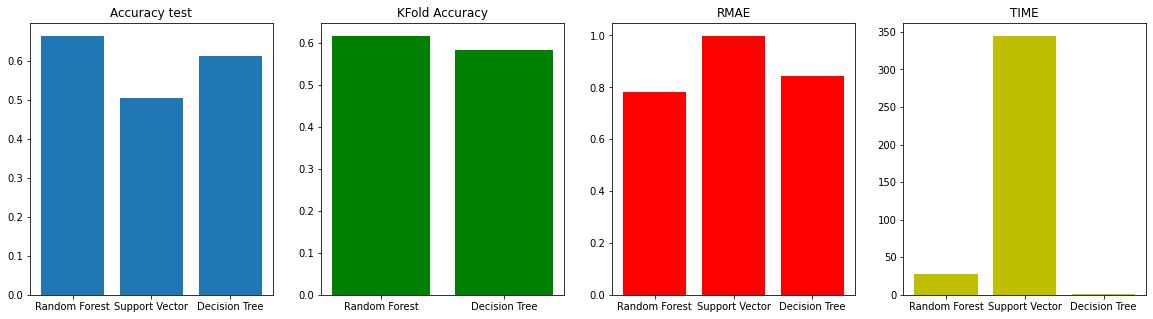

In [0]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Accuracy test')
y1= pd.Series([0.6640973142237745,0.5046970974346622 ,0.6130314344212935 ])              
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
plt.bar(x1, y1, align="center")

plt.subplot(1,4,2)
plt.title('KFold Accuracy')
x1= ['Random Forest', 'Decision Tree']
y2= pd.Series([0.6168255442, 0.5828602671])
plt.bar(x1, y2, align="center", color="g")

plt.subplot(1,4,3)
plt.title('RMAE')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y3= pd.Series([0.781654643492485,0.9981616246526925 , 0.8447470005163488])
plt.bar(x1, y3, align="center", color="r")

plt.subplot(1,4,4)
plt.title('TIME')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y4= pd.Series([27.80896806716919,344.6414351463318 , 1.1035921573638916]) #tiempo
plt.bar(x1, y4, align="center", color="Y")

plt.show()

Con las graficas podemos ver de una mejor manera el comportamiento de cada uno de los clasificadores cuando se toma como ground truth la columna estrato, debido a los datos que contiene el dataset podemos observar que el accuracy se encuentra en un rango de 0.5 a 0.7 lo cual podemos considerarlo como un resultado aceptable para nuestro trabajo de clase, sin embargo, podemos notar que el clasificador que mejor se comporta en este caso es el Random Forest teniendo en cuenta su precisión y su poco tiempo de ejecución a comparción de los otros dos clasificadores.


In [0]:
t2={'Accuracy test' : pd.Series([0.8121161026135132,0.7532819462844755 ,0.812718294592316 ], index=['Random Forest', 'Support Vector', 'Decision Tree']), 'KFold Accuracy' : pd.Series([0.8027813481, 0.8000703597], index=['Random Forest', 'Decision Tree']),'RMAE' : pd.Series([0.4639217748975961, 0.5284282548945296, 0.4652827273600663], index=['Random Forest', 'Support Vector', 'Decision Tree']),'Tiempo de Ejecución' : pd.Series([23.54857635498047, 185.23534488677979, 1.195533037185669], index=['Random Forest', 'Support Vector', 'Decision Tree'])}
tabla2 = pd.DataFrame(data=t2)
display(HTML('<h3>TIPO DE VIVIENDA</h3>'))
tabla2

,Accuracy test,KFold Accuracy,RMAE,Tiempo de Ejecución
Decision Tree,0.812718,0.800070,0.465283,1.195533
Random Forest,0.812116,0.802781,0.463922,23.548576
Support Vector,0.753282,NaN,0.528428,185.235345


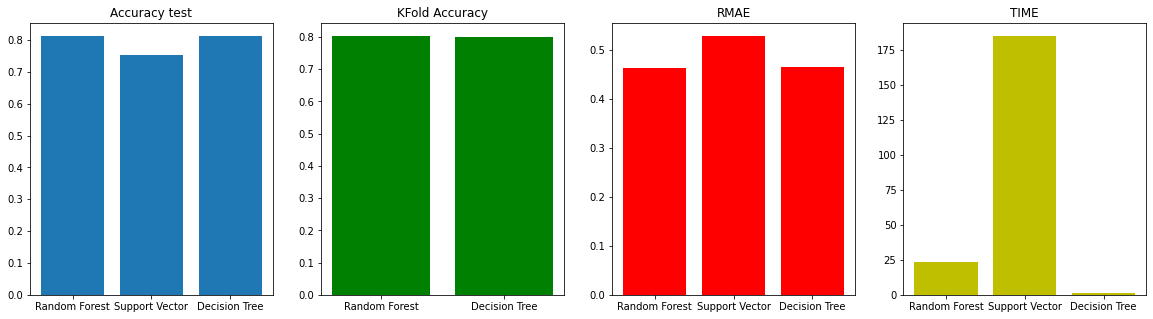

In [0]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Accuracy test')
y1= pd.Series([0.8121161026135132,0.7532819462844755 ,0.812718294592316 ])              
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
plt.bar(x1, y1, align="center")

plt.subplot(1,4,2)
plt.title('KFold Accuracy')
x1= ['Random Forest', 'Decision Tree']
y2= pd.Series([0.8027813481, 0.8000703597])
plt.bar(x1, y2, align="center", color="g")

plt.subplot(1,4,3)
plt.title('RMAE')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y3= pd.Series([0.4639217748975961, 0.5284282548945296, 0.4652827273600663])
plt.bar(x1, y3, align="center", color="r")

plt.subplot(1,4,4)
plt.title('TIME')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y4= pd.Series([23.54857635498047, 185.23534488677979, 1.195533037185669]) #tiempo
plt.bar(x1, y4, align="center", color="Y")

plt.show()

En esta parte al analizar los resultados dados por los clasificadores cuando se toma como clase el tipo de vivienda podemos notar que el accuracy de los clasificadores ha aumentado de una manera significativa teniendo en cuenta que esta vez los resultados rondan el rango de 0.75 a 0.81 y notando que los tres clasificadores utilizados se comportaron de una manera muy similar esta vez siendo el ganador el Desision tree al tener el menor tiempo de ejecución y el mejor accuracy, por otro lado teniendo en cuenta el RMAE podemos ver que Support Vector es el que tiene el resultado más elevado pero esto se ve afectado al tener en cuenta el tiempo de ejecución que este gasta al comparar los otros dos.

In [0]:
t3={'Accuracy test' : pd.Series([0.7038419848247621,0.7075153558954594 ,0.6845718415030712 ], index=['Random Forest', 'Support Vector', 'Decision Tree']), 'KFold Accuracy' : pd.Series([0.6790920334, 0.6865586851, 0.6701790546], index=['Random Forest', 'Support Vector', 'Decision Tree']),'RMAE' : pd.Series([0.6901258117438935, 0.6852658645157049, 0.703991476194662], index=['Random Forest', 'Support Vector', 'Decision Tree']),'Tiempo de Ejecución' : pd.Series([26.5509033203125, 26.468188524246216, 1.1593241691589355], index=['Random Forest', 'Support Vector', 'Decision Tree'])}
tabla3 = pd.DataFrame(data=t3)
display(HTML('<h3>MATERIAL DEL TECHO</h3>'))
tabla3

,Accuracy test,KFold Accuracy,RMAE,Tiempo de Ejecución
Random Forest,0.703842,0.679092,0.690126,26.550903
Support Vector,0.707515,0.686559,0.685266,26.468189
Decision Tree,0.684572,0.670179,0.703991,1.159324


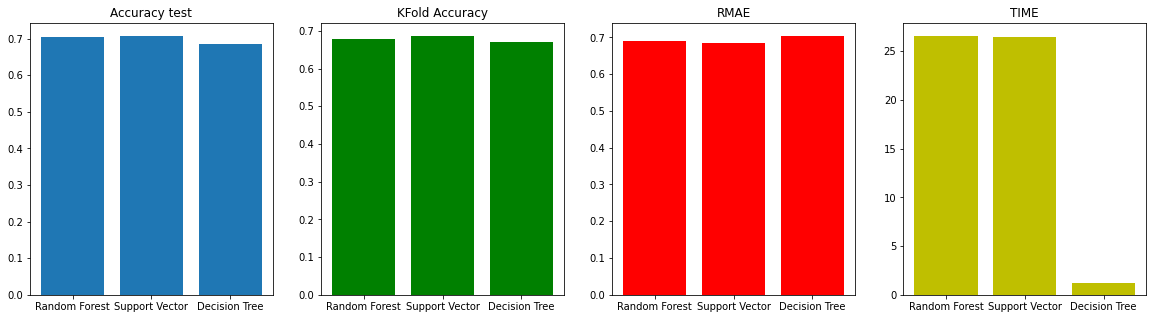

In [0]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Accuracy test')
y1= pd.Series([0.7038419848247621,0.7075153558954594 ,0.6845718415030712 ])              
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
plt.bar(x1, y1, align="center")

plt.subplot(1,4,2)
plt.title('KFold Accuracy')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y2= pd.Series([0.6790920334, 0.6865586851, 0.6701790546])
plt.bar(x1, y2, align="center", color="g")

plt.subplot(1,4,3)
plt.title('RMAE')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y3= pd.Series([0.6901258117438935, 0.6852658645157049, 0.703991476194662])
plt.bar(x1, y3, align="center", color="r")

plt.subplot(1,4,4)
plt.title('TIME')
x1= ['Random Forest', 'Support Vector', 'Decision Tree']
y4= pd.Series([26.5509033203125, 26.468188524246216, 1.1593241691589355]) #tiempo
plt.bar(x1, y4, align="center", color="Y")

plt.show()

Por ultimo al tener como clase uno de los materiales de la vivienda en este caso el techo podemos ver que los tres clasificadores tienen resultados muy similares a excepción del tiempo de ejecución el cual podemos ver que el decision tree es mucho menor en comparación.

# **7. CONCLUSIONES**
* La muestra de datos B nos garantizó un entrenamiento más preciso en los clasificadores, teniendo en cuenta que posee menos características que la muestra de datos A.
* Las características de la encuesta brindó una disticción notable entre el nivel de estrato y tipo de vivienda; es decir, a partir de estas es posible realizar posteriores clasificaciones, involucrando factores sociales.
* La clase con mejor acurracy es Tipo de Vivienda. Por lo tanto, se puede inferir que los hogares colombianos se distinguen más por habitar en una casa, apartamento, entre otros que por su nivel de estrato.
* La implementación de PCA es notamble, ya que se ajustaron características que, a través de un analisis cualitativo, se consideraban menos importantes cuando cuantitavemente nos dio mejor precisión.
* Los clasificadores Random Forest y Decision Tree se ejecutaron en menor tiempo que el Support Vector. También, el acuraccy de estos son mejores en la clasificación de todas las clases ajustadas.
* Con KFold Accuracy se aseguró la predicción de los datos pero se arriesga tiempo de ejecución notablemente.